In [1]:
from sklearn import tree
from sklearn.datasets import load_wine
from sklearn.model_selection import train_test_split
%matplotlib inline

In [2]:
wine = load_wine()
X=wine.data
Y=wine.target

In [3]:
wine

{'DESCR': '.. _wine_dataset:\n\nWine recognition dataset\n------------------------\n\n**Data Set Characteristics:**\n\n    :Number of Instances: 178 (50 in each of three classes)\n    :Number of Attributes: 13 numeric, predictive attributes and the class\n    :Attribute Information:\n \t\t- Alcohol\n \t\t- Malic acid\n \t\t- Ash\n\t\t- Alcalinity of ash  \n \t\t- Magnesium\n\t\t- Total phenols\n \t\t- Flavanoids\n \t\t- Nonflavanoid phenols\n \t\t- Proanthocyanins\n\t\t- Color intensity\n \t\t- Hue\n \t\t- OD280/OD315 of diluted wines\n \t\t- Proline\n\n    - class:\n            - class_0\n            - class_1\n            - class_2\n\t\t\n    :Summary Statistics:\n    \n    ============================= ==== ===== ======= =====\n                                   Min   Max   Mean     SD\n    ============================= ==== ===== ======= =====\n    Alcohol:                      11.0  14.8    13.0   0.8\n    Malic Acid:                   0.74  5.80    2.34  1.12\n    Ash:           

In [4]:
datalens=len(X)
print(datalens)
precentage=0.7
train_size=int(datalens*precentage)
print(train_size)

178
124


In [8]:
Xtrain=X[0:train_size,:]
Xtrain

array([[1.423e+01, 1.710e+00, 2.430e+00, ..., 1.040e+00, 3.920e+00,
        1.065e+03],
       [1.320e+01, 1.780e+00, 2.140e+00, ..., 1.050e+00, 3.400e+00,
        1.050e+03],
       [1.316e+01, 2.360e+00, 2.670e+00, ..., 1.030e+00, 3.170e+00,
        1.185e+03],
       ...,
       [1.156e+01, 2.050e+00, 3.230e+00, ..., 9.300e-01, 3.690e+00,
        4.650e+02],
       [1.242e+01, 4.430e+00, 2.730e+00, ..., 9.200e-01, 3.120e+00,
        3.650e+02],
       [1.305e+01, 5.800e+00, 2.130e+00, ..., 7.300e-01, 3.100e+00,
        3.800e+02]])

In [9]:
Xtest=X[train_size:datalens,:]
Xtest

array([[1.187000e+01, 4.310000e+00, 2.390000e+00, 2.100000e+01,
        8.200000e+01, 2.860000e+00, 3.030000e+00, 2.100000e-01,
        2.910000e+00, 2.800000e+00, 7.500000e-01, 3.640000e+00,
        3.800000e+02],
       [1.207000e+01, 2.160000e+00, 2.170000e+00, 2.100000e+01,
        8.500000e+01, 2.600000e+00, 2.650000e+00, 3.700000e-01,
        1.350000e+00, 2.760000e+00, 8.600000e-01, 3.280000e+00,
        3.780000e+02],
       [1.243000e+01, 1.530000e+00, 2.290000e+00, 2.150000e+01,
        8.600000e+01, 2.740000e+00, 3.150000e+00, 3.900000e-01,
        1.770000e+00, 3.940000e+00, 6.900000e-01, 2.840000e+00,
        3.520000e+02],
       [1.179000e+01, 2.130000e+00, 2.780000e+00, 2.850000e+01,
        9.200000e+01, 2.130000e+00, 2.240000e+00, 5.800000e-01,
        1.760000e+00, 3.000000e+00, 9.700000e-01, 2.440000e+00,
        4.660000e+02],
       [1.237000e+01, 1.630000e+00, 2.300000e+00, 2.450000e+01,
        8.800000e+01, 2.220000e+00, 2.450000e+00, 4.000000e-01,
        1.90

In [10]:
Ytrain=Y[0:train_size]
Ytrain

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [12]:
Ytest=Y[train_size:datalens]
Ytest

array([1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

In [13]:
#生成模型
clf=tree.DecisionTreeClassifier()
clf.fit(Xtrain,Ytrain)
score=clf.score(Xtrain,Ytrain)
print(score)

1.0


In [15]:
YTestPrediction=clf.predict(Xtest)
YTestPrediction

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 1, 1, 0, 0, 0, 0, 0, 0])

In [7]:
Ytest=Ytest.reshape(-1,1)
score1=clf.score(Ytest,YTestPrediction)

ValueError: Number of features of the model must match the input. Model n_features is 13 and input n_features is 1 

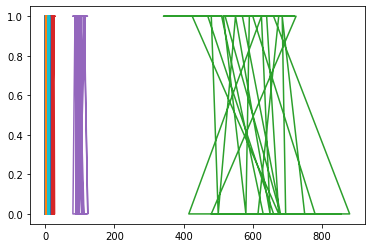

In [39]:
import matplotlib.pyplot as plt
plt.plot(Xtest,YTestPrediction)